In [1]:
import cv2
import numpy as np
import pandas as pd

In [2]:
import os
import matplotlib.pyplot as plt

In [3]:
location = 'E:\Images\JPEG'
list_images = os.listdir(location)
len(list_images)

801

In [4]:
images = []
new_location = 'E:\Images\data'
for image in list_images:
    img_location = os.path.join(location, image)
    img = cv2.imread(img_location)
    img = img[:, :, 1]
    images.append(img)
#     cv2.imwrite(os.path.join(new_location, image), img)

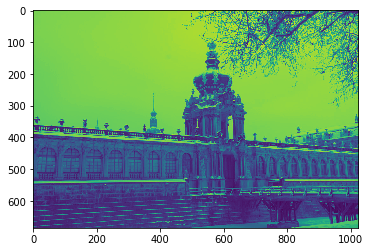

In [5]:
plt.imshow(images[0])
plt.show()

In [6]:
target = np.zeros((len(images), 1), dtype = np.int32)

In [7]:
for image, name in zip(images, list_images):
    blur = cv2.GaussianBlur(image, (5, 5), 0)
    name = "1" + name
#     cv2.imwrite(os.path.join(new_location, name), blur)
    target = np.concatenate((target, np.ones((1, 1))), axis = 0)
    images.append(blur)

In [8]:
len(images), len(target)

(1602, 1602)

In [9]:
# X = np.array([[1., 0.], [2., 1.], [0., 0.]])
# y = np.array([0, 1, 2])
# from sklearn.utils import shuffle
# X, y = shuffle(X, y, random_state=0)

In [10]:
from sklearn.utils import shuffle

images, target = shuffle(images, target, random_state = 0)

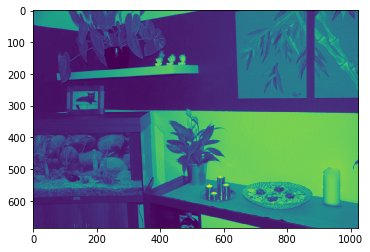

In [11]:
plt.imshow(images[40])
plt.show()

In [13]:
from sklearn.feature_extraction.image import extract_patches_2d

patches = extract_patches_2d(images[40], (256, 256), max_patches = 9, random_state = 1)

In [35]:
y = target[:5]
test = []
test.extend(np.repeat(y, 3).tolist())
np.array(test).reshape(15,1)

array([[1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [38]:
train_data = []
test_data = []
i = 0
for image, y in zip(images, target):
    patches = extract_patches_2d(image, (256, 256), max_patches = 9, random_state = 1)
    train_data.extend(patches)
    test_data.extend(np.repeat(y, len(patches)).tolist())
    if i % 1000 == 0:
        print(i)
    i+=1

0
1000


In [39]:
len(test_data), len(train_data)

(14418, 14418)

In [45]:
train_data = np.array(train_data)
test_data = np.array(test_data)

In [47]:
import pickle
with open('image_train.pkl', 'wb') as f:
    pickle.dump(train_data, f)

In [49]:
with open('image_test.pkl', 'wb') as f1:
    pickle.dump(test_data, f1)